# Q1: Sparse Signal Recovery - Recover a grayscale image

An image (in black and white) is in fact a matrix whose values represent the intensity of a pixel.
The goal of this exercise is to recover an unknown grayscale image (called the ”signal”) based on linear
measurements using the sparsity of the signal in the discrete cosine transform domain.

### (a) [2] First load the image (in color: RGB = red, green, blue) and convert it into a black & white image, then into an A matrix with numpy, and check visually.

In [1]:
%cd /home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/HDDA/labs/final

/home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/HDDA/labs/final


/home/luzinsan/.cache/pypoetry/virtualenvs/classic-ml-scKRehVl-py3.11/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


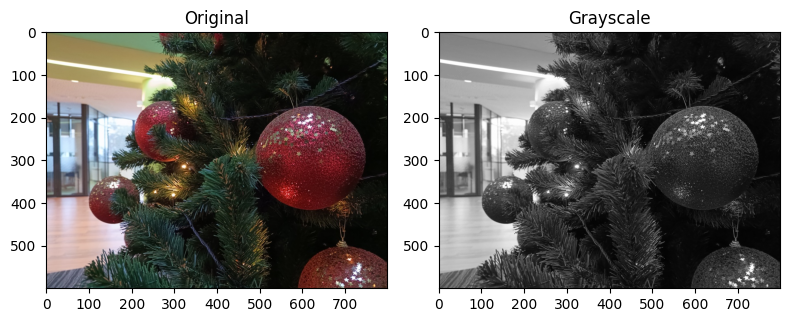

In [2]:
# Import useful modules
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray
from scipy.fft import dct

original = plt.imread('./IMG_20241215_133322_222.jpg')
# Then we convert it in grayscale
grayscale = rgb2gray(original) 
# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
fig.tight_layout()
plt.show()

In [3]:
# We now convert the image into a matrix for processing with numpy
X_o = np.matrix(grayscale)[:, :grayscale.shape[0]]/ 1.0
X_o[:5,:5]

matrix([[0.52160157, 0.53336627, 0.53336627, 0.52160157, 0.52076824],
        [0.51456902, 0.52830588, 0.52830588, 0.52830588, 0.52830588],
        [0.48847922, 0.49437294, 0.49437294, 0.49437294, 0.49829451],
        [0.48228   , 0.48760824, 0.48817373, 0.48368667, 0.48033059],
        [0.4920349 , 0.50603961, 0.50772118, 0.50045137, 0.49317373]])

### (b) [2] Compute the (left) Discrete Cosine Transform (DCT) of $X_o ∈ R^{n_1×n_2}$,   denoted $X_{dct,o}$, such that $X_{dct,o} = ΨX_o$ with $Ψ ∈ O(n_1)$ denoting the (left) DCT matrix (orthogonal matrix of size $n_1$).

In [4]:
X_dct_o = dct(X_o, axis=0, norm='ortho')
X_dct_o

array([[ 1.59325852e+01,  1.59315333e+01,  1.58323917e+01, ...,
         3.52167497e+00,  3.43707183e+00,  3.42236255e+00],
       [-6.93729467e-01, -6.96938223e-01, -6.73302881e-01, ...,
         6.21992614e-01,  5.80048779e-01,  6.37298573e-01],
       [-4.69000519e-01, -4.45865706e-01, -4.04062791e-01, ...,
        -1.78806797e+00, -1.65243913e+00, -1.59769495e+00],
       ...,
       [ 2.24955548e-03,  2.16016244e-03,  1.73812442e-03, ...,
         2.84481553e-02,  2.97673276e-02,  2.00363718e-02],
       [ 1.28026254e-03, -3.02246066e-04,  6.23484034e-04, ...,
         1.91513558e-02, -1.45000664e-02, -2.22325690e-02],
       [-2.04203771e-03,  9.94591356e-04,  4.28435405e-04, ...,
         4.79302941e-03, -2.58181589e-02, -2.03718739e-02]])

In [5]:
Psi = dct(np.eye(X_o.shape[0]), axis=0, norm='ortho')
Psi

array([[ 0.04082483,  0.04082483,  0.04082483, ...,  0.04082483,
         0.04082483,  0.04082483],
       [ 0.05773483,  0.05773325,  0.05773008, ..., -0.05773008,
        -0.05773325, -0.05773483],
       [ 0.05773424,  0.0577279 ,  0.05771524, ...,  0.05771524,
         0.0577279 ,  0.05773424],
       ...,
       [ 0.00045345, -0.00136022,  0.00226667, ..., -0.00226667,
         0.00136022, -0.00045345],
       [ 0.0003023 , -0.00090686,  0.00151133, ...,  0.00151133,
        -0.00090686,  0.0003023 ],
       [ 0.00015115, -0.00045345,  0.00075573, ..., -0.00075573,
         0.00045345, -0.00015115]])

- The left Discrete Cosine Transform (**DCT**) of the image matrix $X_o$ is computed using the formula $X_{dct,o} = \Psi X_o$, where $\Psi$ is the orthogonal DCT matrix of size $n_1$. In the code, this is done using `X_dct_o = dct(X_o, axis=0, norm='ortho')`. The `Psi = dct(np.eye(n_1), axis=0, norm='ortho')` line calculates the DCT matrix $\Psi$ itself.

Display the entries of $X_{dct,o}$ and plot the Ordered Histogram of DCT Coefficients. Comment the results. What is the structure of $X_{dct,o}$?

First 5 entries of X_dct_o:
 [[15.93258516 15.93153329 15.83239166 15.84208665 15.87516822]
 [-0.69372947 -0.69693822 -0.67330288 -0.67226774 -0.67633089]
 [-0.46900052 -0.44586571 -0.40406279 -0.43642892 -0.46118899]
 [-0.30524526 -0.33329308 -0.35683058 -0.37128132 -0.34942188]
 [-0.94209922 -0.96078774 -1.02572709 -1.02027774 -0.99490241]]
Last 5 entries of X_dct_o:
 [[-0.00119786  0.02491086  0.02316237 -0.02040625  0.03136106]
 [ 0.0405731   0.01001711  0.00541623  0.02055973  0.00128167]
 [ 0.06219312  0.04340137  0.02844816  0.02976733  0.02003637]
 [-0.00904142  0.03020142  0.01915136 -0.01450007 -0.02223257]
 [-0.04548295  0.00880859  0.00479303 -0.02581816 -0.02037187]]


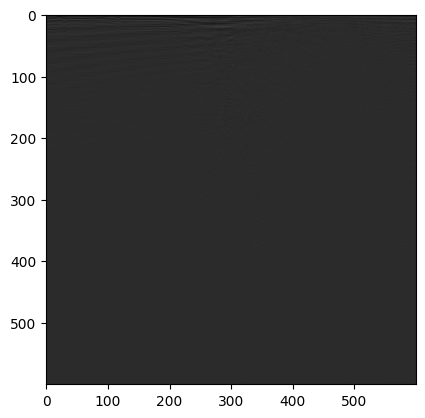

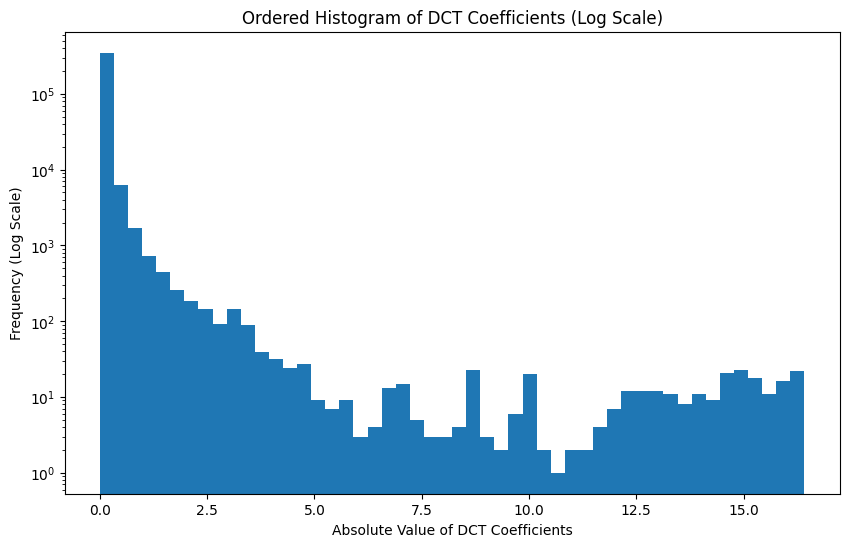

Size X_dct_0 (600, 600)
Size of Psi (600, 600)


In [6]:
# Display the entries of X_dct_o
print("First 5 entries of X_dct_o:\n", X_dct_o[:5, :5])
print("Last 5 entries of X_dct_o:\n", X_dct_o[-5:, -5:])
plt.imshow(X_dct_o, cmap=plt.cm.gray)

# Display the ordered histogram of DCT coefficients
plt.figure(figsize=(10, 6))
plt.hist(np.sort(np.abs(X_dct_o.flatten())), bins=50, log=True)
plt.title("Ordered Histogram of DCT Coefficients (Log Scale)")
plt.xlabel("Absolute Value of DCT Coefficients")
plt.ylabel("Frequency (Log Scale)")
plt.show()

print(f"Size X_dct_0 {X_dct_o.shape}")
print(f"Size of Psi {Psi.shape}")

- The entries of $X_{dct,o}$ represent the DCT coefficients of the image. These coefficients quantify the contribution of each cosine basis function to the original image.

- The structure of $X_{dct,o}$ is such that the top-left coefficients (low-frequency components) tend to have larger magnitudes, representing the overall structure and brightness of the image. The bottom-right coefficients (high-frequency components) tend to have smaller magnitudes, representing finer details. The histogram confirms that most of the energy is concentrated in the lower-frequency components, which is a common property of natural images.

- Sparsity - a very large number of coefficients have values close to zero (as seen in the leftmost bin, which is orders of magnitude larger than the rest). This confirms that the image is highly compressible in the DCT domain, meaning that a few large coefficients carry most of the information.

- The coefficients with larger magnitudes are relatively few. These correspond to the lower-frequency components of the image, which typically contain most of the image's energy.

- Non-Uniform Distribution: The distribution of the coefficients is not uniform. There's a rapid decay in the number of coefficients as their magnitude increases, which is typical for natural images.



### (c) [4] Image now we are interested in recovering $X_o$ solely based on some linear measurements $Y \in R^{m×n_2}$ obtained through some random linear operators as follows: $Y = \Phi X_0$, with $\Phi$ a random matrix ($\Phi_{i,j} ∼ U(0, 1), \forall i,j$) of size $m \times n_1$. 

Explain the general approach to recover $X_o$ based on $Y$ (and the conclusions of part (b)), and formulate an optimization problem based on the $ℓ^0$ norm minimization. Then explain the main challenge with such a formulation. Is it a tractable problem?

**General Approach:**

Our goal is to recover the original image $X_0$ from the linear measurements $Y = \Phi X_0$. We are given that the Discrete Cosine Transform (DCT) of the image, denoted as $X_{dct,o} = \Psi X_0$, is sparse. This sparsity is key to the recovery process.

We can rewrite the measurement equation as $Y = \Phi \Psi ^{-1} X_{dct,0}$. 
- By defining $A = \Phi \Psi^{-1}$ and $x = X_{dct,0}$, 
- we obtain a standard form equation $Y = Ax$, where $x$ is a sparse vector representing the DCT coefficients of the image.

The strategy involves finding the sparse solution $x$ that satisfies this equation, and then recovering $X_0$ by applying the inverse DCT: 
- $X_0 = \Psi^{-1} x$.

**Optimization Problem ($l_0$-norm Minimization):**

To find the sparse $X_{dct,0}$, we formulate the following optimization problem:

   $$min_x ||x||_0  \text{ s.t. } Y = Ax$$


where:
*   $||x||_0$ is the $l_0$ "norm", which counts the number of non-zero elements in $x$.
*   $x$ represents $X_{dct,0}$.
*   $A = \Phi \Psi^{-1}$.

This problem aims to find the sparsest signal $x$ that is consistent with the linear measurements $Y$.

**Main Challenge:**

The primary challenge is that solving the $l_0$-norm minimization problem is computationally very difficult (NP-hard). It essentially requires evaluating all possible combinations of non-zero elements in $x$, which becomes impractical for even moderately sized images.

**Is it a tractable problem?**

No, due to its NP-hard nature, this problem is generally not tractable for large images. Direct computation methods are infeasible because of the vast number of combinations that need to be checked.

**Possible Algorithm for Finding a Sparse Solution:**

One approach to finding a sparse solution involves an **exhaustive search**:

**Pseudocode:**


```python
Input: A (ΦΨ⁻¹), Y, estimated sparsity k
Output: x (representing X_dct_o)

for k = 0 to n1  // Iterate through possible sparsity levels
  for each index set I of size k  // Iterate through all combinations of k indices
    A_I = submatrix of A with columns from I
    x_I = vector of zeros of size k

    if A_I x_I = Y has a solution:
      x = vector of zeros of size n1
      x[I] = x_I  // Fill x with the solution from x_I at the indices in I
      return x
    end if
  end for
end for

return "No solution found for the given k values"
```


The algorithm systematically checks for solutions with increasing sparsity levels (number of non-zero elements). For each sparsity level $k$, it considers every possible set of $k$ column indices from matrix $A$. It then attempts to solve a reduced linear system using only these columns. If a solution is found, it's a candidate for the sparse $X_{dct,0}$.

- This **exhaustive search** method has significant limitations. Its computational cost grows exponentially with the size of the problem, making it impractical for large-scale applications. It is only feasible for very small or extremely sparse signals. 


### (d) [5] Now, propose a convex relaxation of this first optimization problem and derive an algorithm to solve it relying on the subgradient method.

**Convex Relaxation:**

The original $l_0$-minimization problem is computationally intractable. To make it more manageable, we can relax it by replacing the $l_0$ "norm" with the $l_1$ norm. This is a common technique known as **convex relaxation**. The $l_1$ norm is the closest convex function to the $l_0$ "norm" (convex envelope).

Thus, we replace the original problem with the following **l1-minimization problem**:
$$min_x ||x||_1 \text{ s.t. }  Y = Ax$$

where:

*   $||x||_1$ is the $l_1$ norm.
*   $x$ represents $X_{dct,0}$.
*   $A = \Psi \Phi^{-1}$.
*   $Y$ is our measurement matrix.

This relaxed problem is now a convex optimization problem, which means we can use efficient algorithms to find its global minimum.

**Derivation of the Algorithm:**

We'll use the **projected subgradient method** to solve this. Here's why and how:

1. The problem has a constraint $Y = Ax$. We need a method that can handle such constraints.
2. The $l_1$ norm is not differentiable at points where $x=0$. Therefore, we can't directly use gradient descent. The subgradient method is designed for such non-differentiable convex functions.

**Projected Subgradient Method:**

The general form of the projected subgradient method is:
$$x_{k+1} = P_C[x_k - \alpha_k g_k]$$
where:

*   $x_k$ is the solution at iteration $k$.
*   $\alpha_k$ is the step size at iteration $k$.
*   $g_k$ is a subgradient of the objective function at $x_k$.
*   $P_C[.]$ is the projection operator onto the constraint set $C = \{x | Y = Ax\}$.

**Applying it to our problem:**

1. **Objective function:** $f(x) = ||x||_1$
2. **Subgradient of l1 norm:** A subgradient $g$ of $||x||_1$ at $x$ is given by the element-wise sign function:
    ```
    g_i = sign(x_i)  if x_i ≠ 0
    g_i ∈ [-1, 1]   if x_i = 0
    ```
    We can simply use $g = sign(x)$ for our algorithm.
3. **Projection onto the constraint set:** The constraint set is $C = \{x | Y = Ax\}$. Projecting a point $z$ onto $C$ involves finding the closest point in $C$ to $z$. If $A$ has full row rank, the projection is given by:
    $$Pc[z] = z - A'(AA')⁻¹(Az - Y)$$
    where $A'$ denotes the transpose of $A$.

```python
Input: A = ΦΨ⁻¹ in R^{m by n}, y in R^m
Initialization:
    Γ = I - A^T(A A^T)⁻¹A  // Precompute the projection matrix
    x_0 = A^T (A A^T)⁻¹ y // first approximation
    t = 0
    
Iteration:
    1. g_t = sign(x_t)  // Compute a subgradient of ||x||_1 at x_t
    2. x_{t+1} = x_t + Γ(x_t - g_t / t) // Projected subgradient update
    3. k = k + 1
    Repeat steps 1-3 until convergence (e.g., until the change in x is small enough, or a maximum number of iterations is reached)
```


The projected subgradient method is guaranteed to converge to the optimal solution of the l1-minimization problem/


### (e) [8] It is time to test your algorithm ! Implement the algorithm in Python and test it with the following testing procedure

In [7]:
def minimize_l1_projected_subgradient(A,y,iterations=100, step_size=0.00001):
    """
    This function implements the projected subgradient method to minimize the l1 norm.
    
    Args:
        A: The matrix ΦΨ⁻¹ in R^{m by n}.
        y: The measurement vector in R^m.
        iterations: The number of iterations to run the algorithm.
        step_size: The step size for the subgradient method.
    
    Returns:
        x_t: The estimated sparse solution.
        results: A list of errors at each iteration.
    """
    n = A.shape[1]
    # Calculate the pseudo-inverse of A
    A_dag = A.T @ np.linalg.inv(A@A.T)
    print("A_dag shape: ", A_dag.shape)
    print("y shape: ", y.shape)
    # Initialize x_estimated as the least squares solution
    x_estimated = A_dag @ y
    # Calculate the projection matrix Gamma
    Gamma = np.eye(n) - A.T @ np.linalg.inv(A@A.T) @ A
    x_t = np.zeros(n)

    results = []
    for i in range(iterations):
          # Update x_t using the projected subgradient method
          x_t = x_estimated + Gamma @(x_t - step_size*np.sign(x_t))
          results.append(np.linalg.norm(A@x_t - y) / np.linalg.norm(y))
    return x_t, results

##### 1. Build the matrices Φ and Ψ, and the measurements Y .

In [8]:
m = 150 # number of measurements
n1, n2 = X_o.shape # shape of the image
Phi = np.random.rand(m, n1)

Y = Phi @ X_o

##### 2. Set m = 150, run your algorithm and check its numerical convergence.

A_dag shape:  (600, 150)
y shape:  (150, 600)


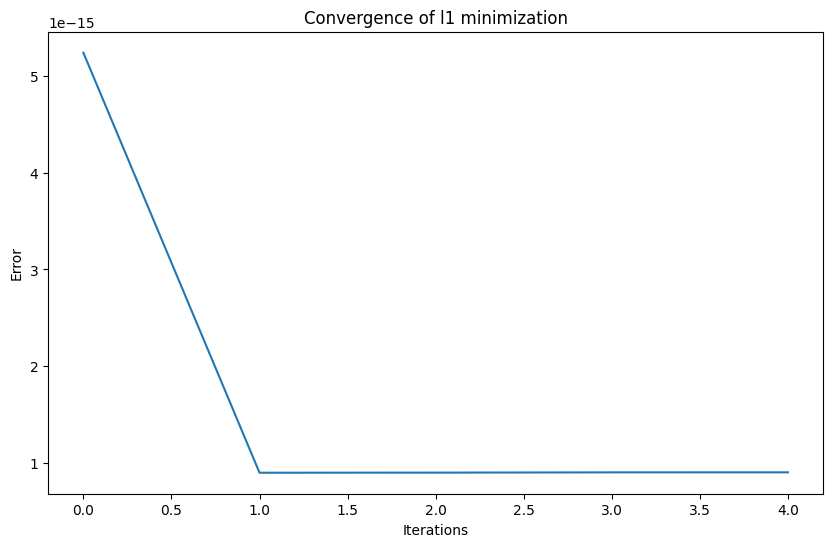

Final error: 9.061265286506286e-16


In [9]:
X_dct_estimated, results = minimize_l1_projected_subgradient(Phi@Psi, Y, 5)

plt.figure(figsize=(10, 6))
plt.plot(results)
plt.title("Convergence of l1 minimization")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()
print (f"Final error: {results[-1]}")

##### 3. Build your estimate of $X_o$, denoted $X˜_o$, and compare both visually and by computing some classical metrics for image comparison such that the Peak Signal-to-Noise Ratio (PSNR) (higher the better) and the Structural similarity index (close to one the best). The PSNR can be computed using the function PSNR from cv2 Python library, and the Structural similarity index can be computed from `skimage`. Discuss the results.

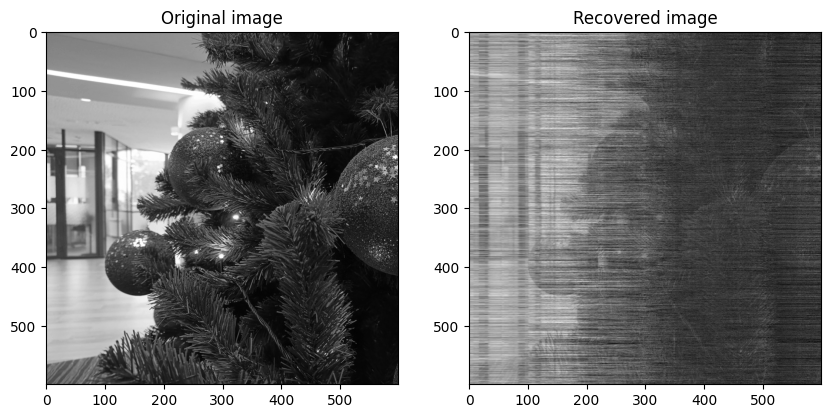

PSNR: 64.33
SSIM: 0.8924


In [10]:
from skimage.metrics import structural_similarity as ssim

X_estimated = Psi @ X_dct_estimated # Reconstruct X from X_dct_estimated
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.imshow(X_o, cmap=plt.cm.gray)
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(X_estimated, cmap=plt.cm.gray)
plt.title("Recovered image")
plt.show()

from cv2 import PSNR

# PSNR (Peak Signal-to-Noise Ratio) measures the quality of the reconstructed image 
# compared to the original image. Higher values indicate better quality.
psnr_value = PSNR(X_o, X_estimated)
# SSIM (Structural Similarity Index) measures the perceptual similarity between two images.
# Values closer to 1 indicate higher similarity.
ssim_value = ssim(X_o, X_estimated, data_range=1)

print(f"PSNR: {psnr_value:.2f}")
print(f"SSIM: {ssim_value:.4f}")

### (f) [4] To improve the results: increase value of m and repeat the procedure, discuss the results.

A_dag shape:  (600, 350)
y shape:  (350, 600)


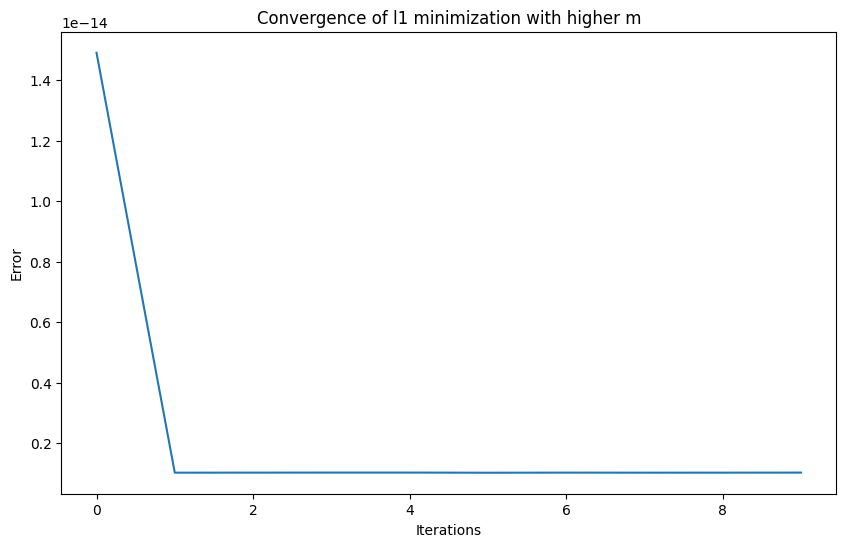

Final error with higher m: 1.0309512524376327e-15


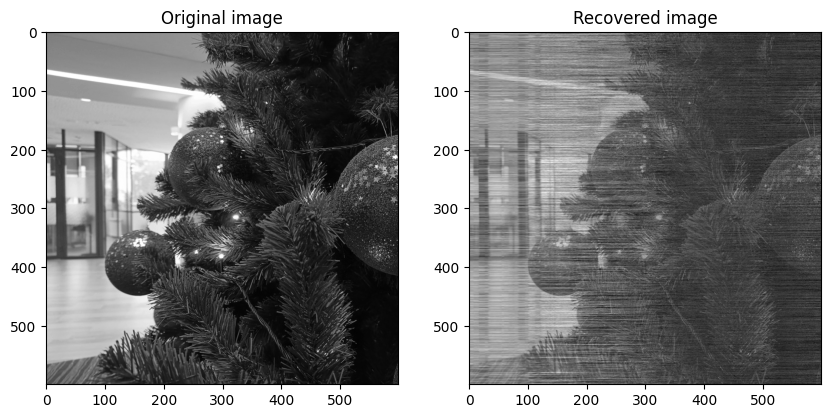

PSNR with higher m: 66.81
SSIM with higher m: 0.9411


In [11]:
#Increase value of m
m = 350
Phi = np.random.rand(m, n1)
Y = Phi @ X_o
X_dct_estimated, results = minimize_l1_projected_subgradient(Phi@Psi, Y, 10)

plt.figure(figsize=(10, 6))
plt.plot(results)
plt.title("Convergence of l1 minimization with higher m")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()
print (f"Final error with higher m: {results[-1]}")

X_estimated = Psi @ X_dct_estimated # Reconstruct X from X_dct_estimated

# 3. Build your estimate of X_o and compare visually and using PSNR and SSIM
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.imshow(X_o, cmap=plt.cm.gray)
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(X_estimated, cmap=plt.cm.gray)
plt.title("Recovered image")
plt.show()

psnr_value = PSNR(X_o, X_estimated)
ssim_value = ssim(X_o, X_estimated, data_range=1)

print(f"PSNR with higher m: {psnr_value:.2f}")
print(f"SSIM with higher m: {ssim_value:.4f}")

Increasing the value of m (number of measurements) generally leads to better  recovery quality because it provides more information about the original image.

With more measurements, the optimization algorithm has a better chance of  finding a sparse solution that accurately represents the original signal.

# Q2: Nonnegative Matrix Factorization (NMF)

The low-rank approximation of a matrix is a key problem in data analysis, and is widely used for Linear Dimensionality Reduction (LDR). LDR techniques such as principal component analysis are powerful tools for the analysis of high-dimensional data. In this exercise, we explore a popular variant of LDR, namely Nonnegative Matrix Factorization (NMF), which consists in a low-rank matrix approximation problem with nonnegativity constraints. More precisely, we seek to approximate a given nonnegative
matrix X with the product of two nonnegative matrices, W and H, of smaller size. The nonnegativity constraints allow to extract easily interpretable and meaningful information from the input data. 

The goal of this question is to implement a few simple algorithms for NMF, and then use them for two applications, namely facial feature extraction and Blind hyperspectral unmixing. We consider the following NMF optimization model

$$min_{W,H} = \frac{1}{2}||X-WH||^2_F \\ s.t. \space W \ge 0, H \ge 0$$

where $X \in R^{m \times n}_+$ is the input matrix, $W \in R^{m \times r}_+$ and $H \in R^{r \times n}_+$ are the variables with r being the given factorization rank, and $∥.∥^2_F$ is the squared Frobenius norm defined as $∥X − W H∥^2_F = \sum_{i,j} [X − W H]^2_{i,j}$.

## Task 1

### (a) [3] Implement the MU for NMF. Try it on a simple problem by generating

```python
import numpy as np
X = np.dot(np.random.rand(m, r), np.random.rand(r, n))
```

and display the evolution of the relative error, $\frac{||X - WH||_F}{||X||_F}$

In [12]:
def error_calc(X, W, H):
  return np.linalg.norm(X - W @ H, 'fro') / np.linalg.norm(X, 'fro')


In [13]:
# Function to perform NMF using the Multiplicative Update (MU) algorithm
def nmf_multiplicative_update(X, rank, max_iter=300, tol=1e-6, log_step=10, error_calc=error_calc, seed=42):
    """
    Performs Nonnegative Matrix Factorization using the Multiplicative Update algorithm.
    
    Parameters:
        X (numpy array): The data matrix of shape (m, n).
        rank (int): The number of components (k).
        max_iter (int): The maximum number of iterations.
        tol (float): The tolerance for convergence.
    
    Returns:
        W (numpy array): The basis matrix of shape (m, k).
        H (numpy array): The coefficient matrix of shape (k, n).
    """
    m, n = X.shape
    # Initialize W and H with random nonnegative values
    np.random.seed(seed)
    W = np.random.rand(m, rank)
    H = np.random.rand(rank, n)

    errors = []
    for i in range(max_iter):
        # Update H
        H = H * (W.T @ X)/(W.T @ W @ H + 1e-9) # Adding a small value to avoid division by zero
        # Update W
        W = W * (X @ H.T)/(W @ H @ H.T + 1e-9)
        
        # Check convergence based on reconstruction error
        if i % log_step == 0:
            errors.append(error_calc(X, W, H))
            # Check for convergence
            if i > 0 and abs(errors[-2] - errors[-1]) < tol:
                print("Converged.")
                break

    plt.figure(figsize=(10, 6))
    plt.plot(errors)
    plt.title(f"Convergence of NMF with rank={rank}. Random seed = {seed}")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.show()
    return W, H

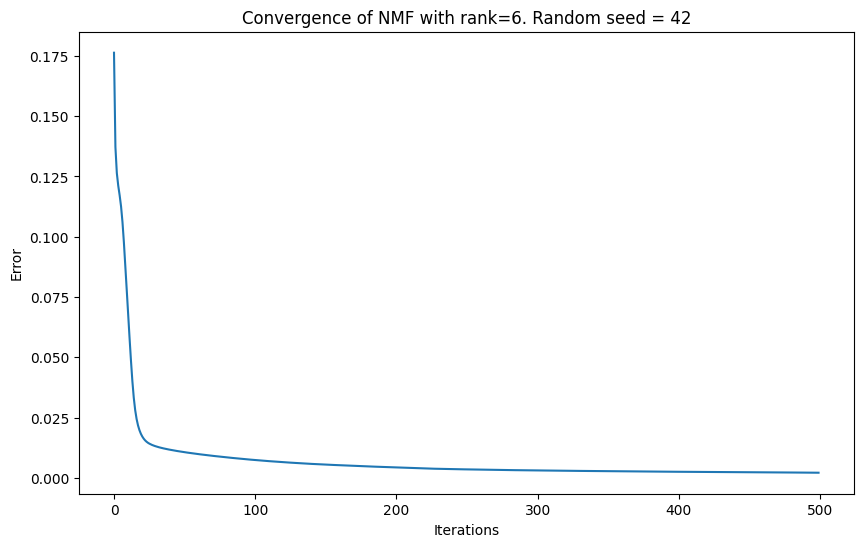

In [14]:
import numpy as np
r = 6
m, n = 600, 800
X = np.dot(np.random.rand(m, r), np.random.rand(r, n))
# Example usage
W, H = nmf_multiplicative_update(X, rank=r, max_iter=5000)

### (b) [3] What is the computational cost of one iteration of the $MU$ (in number of flops)? When computing $W (H H^T)$ in the update of $W$ and $(W^T W )H$ in the update of $H$, why are the parenthesis crucial, especially for sparse matrices?

Each iteration of the MU algorithm involves these primary operations:

1. **Update H:**
`H = H * (W.T @ X) / (W.T @ W @ H)`

2. **Update W:**
`W = W * (X @ H.T) / (W @ H @ H.T)`

We'll estimate the cost of each operation in terms of the number of floating-point operations (additions, multiplications, divisions), assuming the matrices have the following dimensions:

*   `X`: m x n
*   `W`: m x r
*   `H`: r x n
---

*   **`W.T @ X`:** Matrix multiplication of the transpose of `W` (size r x m) with `X` (size m x n). This results in an r x n matrix.
    *   Each element in the resulting matrix (r x n) requires m multiplications and (m-1) additions.
    *   Total: `r * n * (m + m - 1) ≈ 2mnr` flops (floating-point operations).

*   **`W.T @ W`:** Matrix multiplication of the transpose of `W` (size r x m) with `W` (size m x r). This results in an r x r matrix.
    *   Each element in the resulting matrix (r x r) requires m multiplications and (m-1) additions.
    *   Total: `r * r * (m + m - 1) ≈ 2mr^2` flops.

*   **`(W.T @ W) @ H`:** Matrix multiplication of the result of `W.T @ W` (size r x r) with `H` (size r x n). This results in an r x n matrix.
    *   Each element in the resulting matrix (r x n) requires r multiplications and (r-1) additions.
    *   Total: `r * n * (r + r - 1) ≈ 2nr^2` flops.

*   **`X @ H.T`:** Matrix multiplication of `X` (size m x n) with the transpose of `H` (size n x r). This results in an m x r matrix.
    *   Each element in the resulting matrix (m x r) requires n multiplications and (n-1) additions.
    *   Total: `m * r * (n + n - 1) ≈ 2mnr` flops.

*   **`(W @ H) @ H.T`:** Matrix multiplication of `W @ H` (size m x n) with the transpose of `H` (size n x r). This results in an m x r matrix.
    *   First, we compute `W @ H`: `m * n * (r + r -1) ≈ 2mnr` flops.
    *   Then we multiply the result (m x n) by `H.T` (n x r): `m * r * (n + n - 1) ≈ 2mnr` flops.
    *   Total: `2mnr + 2mnr = 4mnr` flops.
    *   However, note that `(W @ H) @ H.T` can be computed more efficiently as `W @ (H @ H.T)`, which requires approximately `2nr^2 + 2mnr` flops.

*   **`H * ...` and `W * ...` (element-wise multiplication):** `mn` flops (negligible compared to matrix multiplication).

*   **`... / ...` (element-wise division):** `mn` flops (negligible compared to matrix multiplication).

**Total Cost of One Iteration:**

Adding up the costs of all operations, we get:

`2mnr + 2mr^2 + 2nr^2 + 2mnr + 2nr^2 + 2mnr ≈ 6mnr + 2mr^2 + 4nr^2`

Since `r` is typically much smaller than `m` and `n`, the dominant term is `6mnr`. Therefore, the cost of one iteration is approximately **`O(mnr + mr^2 + nr^2)`**, and when `r << m, n`, we can simplify it to **`O(mnr)`**.

**Importance of Parentheses:**

As mentioned in the explanation, the order of matrix multiplications is crucial, especially for sparse matrices. Correct placement of parentheses helps avoid the creation of large, dense intermediate matrices, significantly reducing computational cost.

*   `W.T @ (W @ H)` vs. `(W.T @ W) @ H`: If `W` is sparse, computing `W @ H` first might result in a dense matrix, making the subsequent multiplication with `W.T` very expensive. It's generally more efficient to compute `(W.T @ W)` first, which often results in a smaller, potentially sparse matrix, and then multiply it by `H`.
*   `W @ (H @ H.T)` vs. `(W @ H) @ H.T`: Similar reasoning applies here. If `H` is sparse, computing `H @ H.T` first is generally more efficient, as it results in a smaller `r x r` matrix.



In [15]:
print(f"W.T @ X ({2*m*n*r}) + W.T @ W @ H ({2 * m * r * r + 2 * m * r * n}) + X @ H.T ({2 * m * n * r}) + W @ H @ H.T ({2 * n * r * r + 2 * m * n *r}) = {m*n*r + m*r*r + n*r*r}")

W.T @ X (5760000) + W.T @ W @ H (5803200) + X @ H.T (5760000) + W @ H @ H.T (5817600) = 2930400


### (c) [3] Computing the error $∥X − W H∥_F$ naively by forming $W H$ explicitly will require $O(mnr)$ operations and $O(mn)$ memory to store $W H$ (which is typically dense even when $X$ is sparse). 

This can be computed much more efficiently (especially for sparse matrices):

$$∥X - WH∥^2_F = ⟨X − W H, X − W H⟩\\
= ⟨X, X⟩ − 2⟨X, W H⟩ + ⟨W H, W H⟩\\
= ∥X∥^2_F − 2⟨W^T X, H⟩ + ⟨W^T W, HH^T ⟩$$

where $⟨A, B⟩ = \sum^{i,j} A[i, j]B[i, j]$ is the inner product between two matrices of the same size.

Implement the computation of the error in this way. Note that $∥X∥^2_F$ can be computed only once, while $W^T X$ and $W^T W$ are already computed when updating $H$ with the $MU$.

In [16]:
def error_calc_efficiently(X, W, H):
  """
  Efficiently computes the error ||X - WH||_F^2 without explicitly forming WH.

  Args:
      X: The original matrix.
      W: The factor matrix W.
      H: The factor matrix H.

  Returns:
      The squared Frobenius norm of the error, ||X - WH||_F^2.
  """
  return np.sqrt(np.sum(X**2) - 2 * np.sum(W.T @ X * H) + np.sum((W.T @ W) * (H @ H.T))) / np.linalg.norm(X, 'fro')


CPU times: user 9 μs, sys: 0 ns, total: 9 μs
Wall time: 16 μs


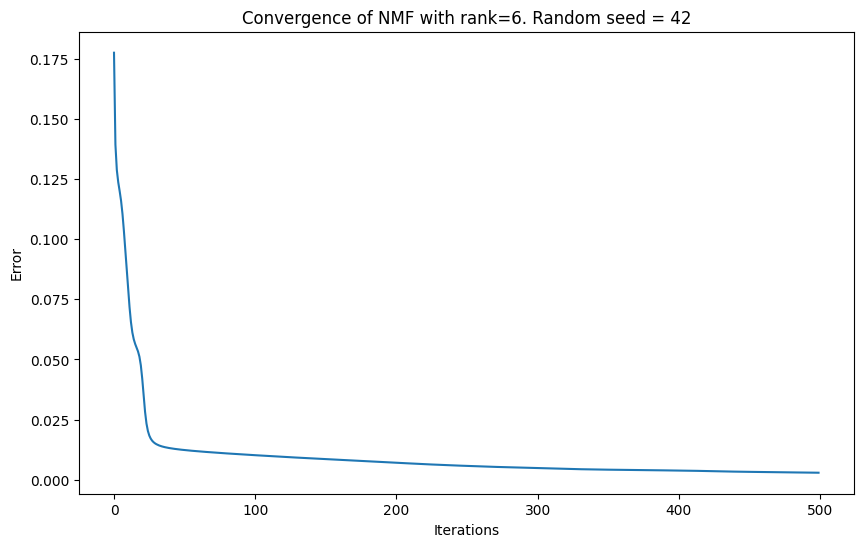

In [17]:
%time
import numpy as np
r = 6
m, n = 600, 800
X = np.dot(np.random.rand(m, r), np.random.rand(r, n))
# Example usage
W, H = nmf_multiplicative_update(X, rank=r, max_iter=5000, error_calc=error_calc_efficiently)

**Applications**

The two data sets CBCL.mat and Urban.mat are available from [this link](https://gitlab.com/ngillis/nmfbook/) (in sub-directory ”data sets”).

## Task 2 - Facial feature extraction: CBCL

In [18]:
from scipy.io import loadmat 
faces = loadmat('./CBCL.mat')['X']

### (a) [5] Load the CBCL data set, and compute an NMF of rank 49 using the MU. 
Then display the facial features extracted. 

*(you can simply reshape the columns of $W \in R^{361\times49}$ as a 19-by-19 image, and display them.)*

CPU times: user 4 μs, sys: 0 ns, total: 4 μs
Wall time: 7.15 μs


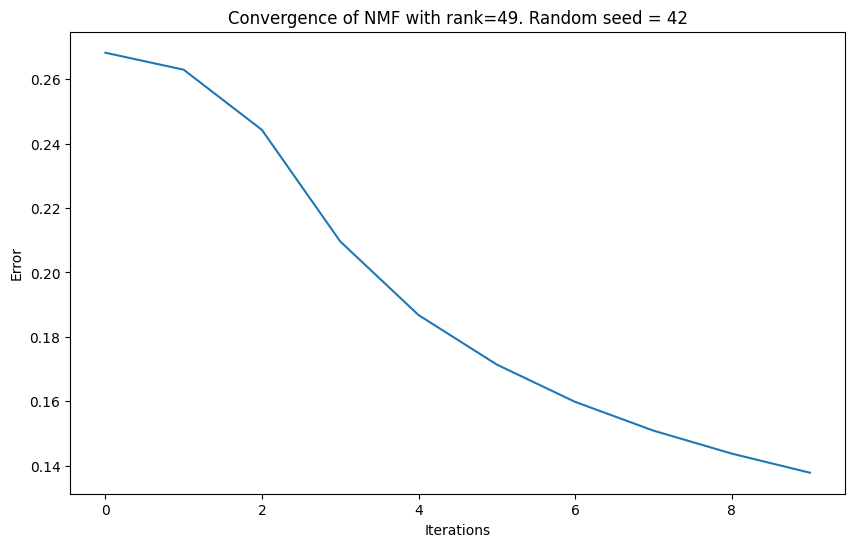

In [19]:
%time
r = 49
m, n = faces.shape
# Example usage
W, H = nmf_multiplicative_update(faces, rank=r, max_iter=100, error_calc=error_calc_efficiently)

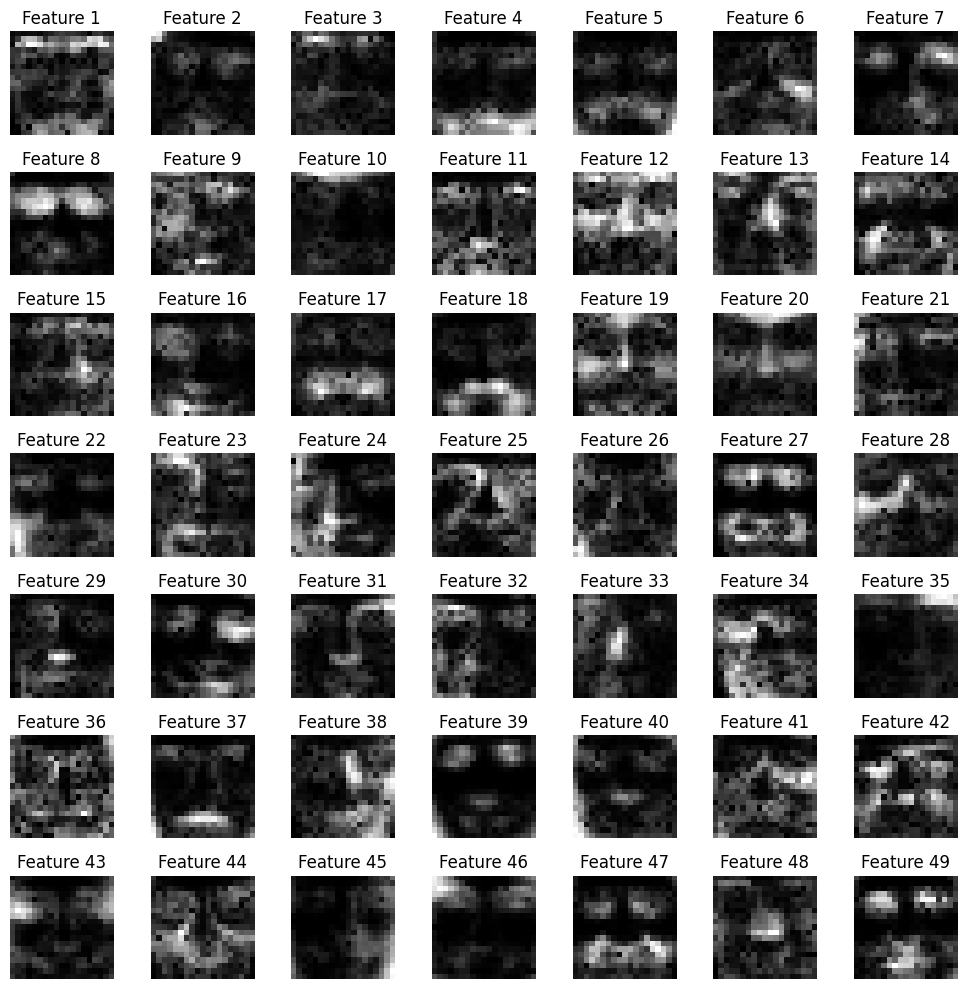

In [20]:
plt.figure(figsize=(10, 10))
for i in range(r):
    feature_image = W[:, i].reshape(19, 19).T  
    plt.subplot(7, 7, i + 1)
    plt.imshow(feature_image, cmap='gray')
    plt.axis('off')
    plt.title(f"Feature {i+1}")
plt.tight_layout()
plt.show()


**X:**
  - Each column represents a single face image, flattened into a vector.
  - The values in each row are the pixel intensities (e.g., grayscale values from 0 to 255) 

**W (Feature Matrix):**
 - Each column of W represents a "facial feature" – like eyes, nose, mouth, or even parts of these features.
 - These features show the basic patterns that, when combined, can make up different faces.

**H (Coefficient Matrix):**
 - The rows in H tell us "how much" of each feature (from W) we need to add together to reconstruct a specific face. For example, one face might have a high value in the row corresponding to the "eyes" feature, meaning that the "eyes" feature is very important in making up that face.

## Task 3 - Blind hyperspectral unmixing: Urban data set

The hyperspectral image consists of 307x307 pixels, with each pixel having 162 spectral bands. These spectral bands represent different wavelengths across the electromagnetic spectrum, allowing for detailed analysis of the scene beyond the visible range.


Each pixel corresponds to one of the following materials present in the scenery (referred to as endmembers): Asphalt Road, Grass, Trees, Roofs and Dirt. Below is a reference decomposition for the urban dataset to help you assessing your results:

$$X(:, j) \approx \sum_{k=1} W(:, k) H(k, j)$$

### (a) [1] Load the Urban data set. 
For convenience, the original order 3 tensor of size 307 × 307 × 162 has been reshaped into a matrix X of size 162 × 94249, such that each column of X corresponds to the spectral signature of one pixel.

In [21]:
urbans = loadmat('./Urban.mat')['X']

### (b) [5] compute an NMF of rank 6 using the $MU$. 
Then interpret the result by identifying displaying each column of $W$, and the the row of $H$ (which have to be reshaped as a 307-by-307 images).

CPU times: user 8 μs, sys: 0 ns, total: 8 μs
Wall time: 11.9 μs


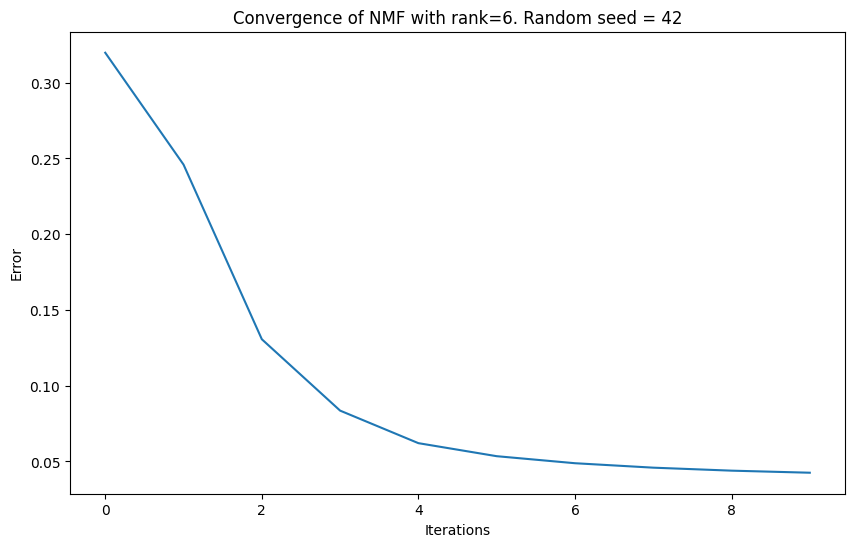

In [22]:
%time
r = 6
m, n = urbans.shape
# Example usage
W, H = nmf_multiplicative_update(urbans, rank=r, max_iter=100, error_calc=error_calc)

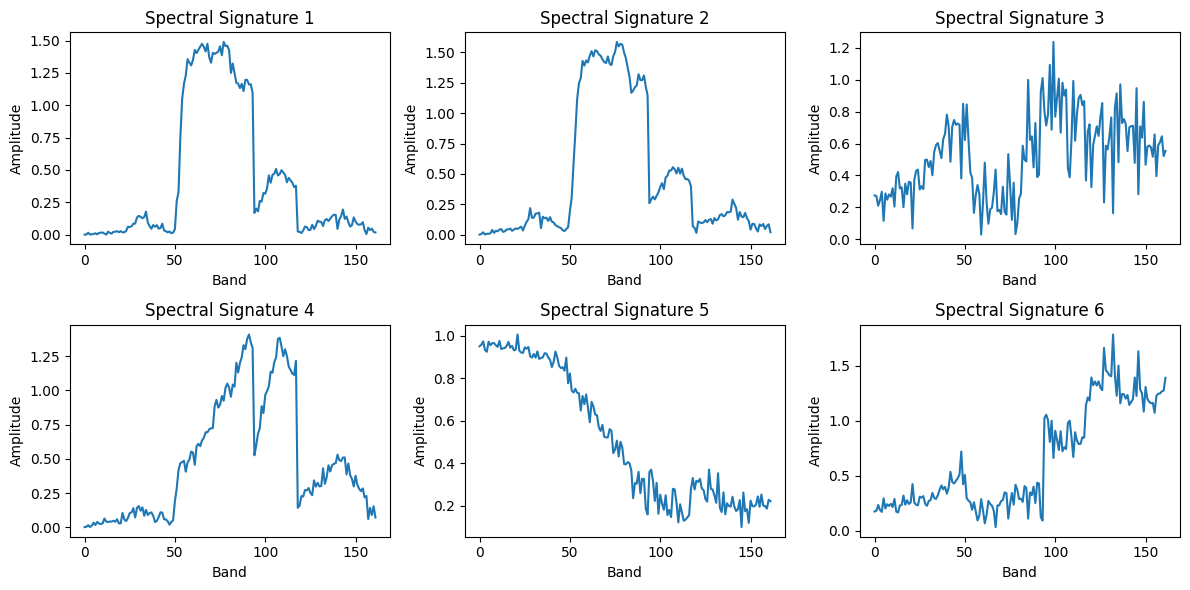

In [23]:
plt.figure(figsize=(12, 6))
for i in range(W.shape[1]):  
    plt.subplot(2,3, i + 1)
    plt.plot(W[:, i])  
    plt.title(f"Spectral Signature {i+1}")
    plt.xlabel("Band")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


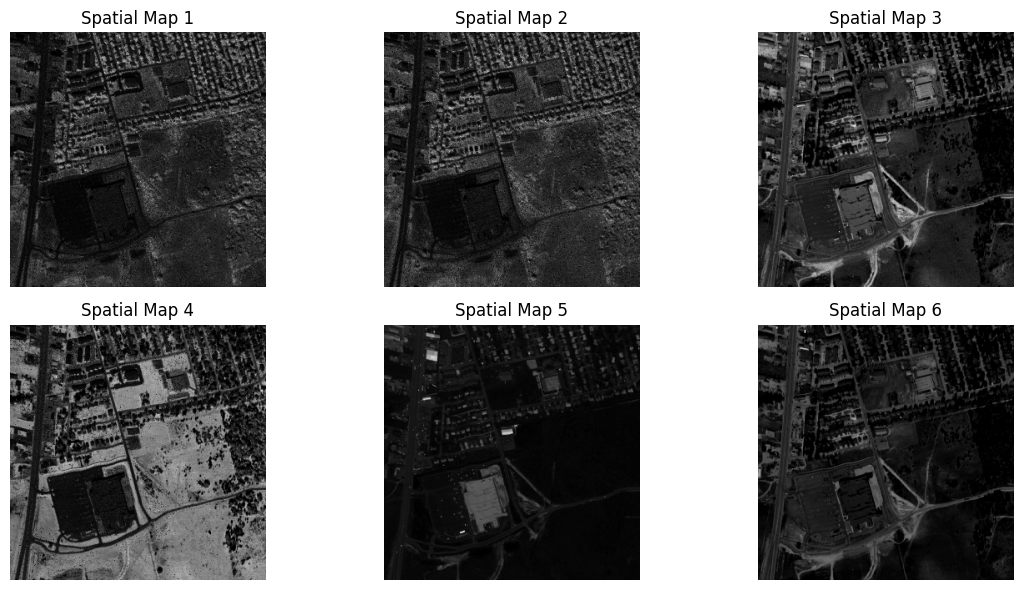

In [24]:
plt.figure(figsize=(12, 6))
for i in range(H.shape[0]):
    spatial_map = H[i, :].reshape(307, 307)  
    plt.subplot(2, 3, i + 1)
    plt.imshow(spatial_map, cmap='gray')
    plt.title(f"Spatial Map {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Task 4 - Sensitivity to initialization

### (a) [2] Repeat tasks 2 for different initial factors $W^{(0)}$ and $H^{(0)}$. 
Do you get the same results?

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 7.15 μs


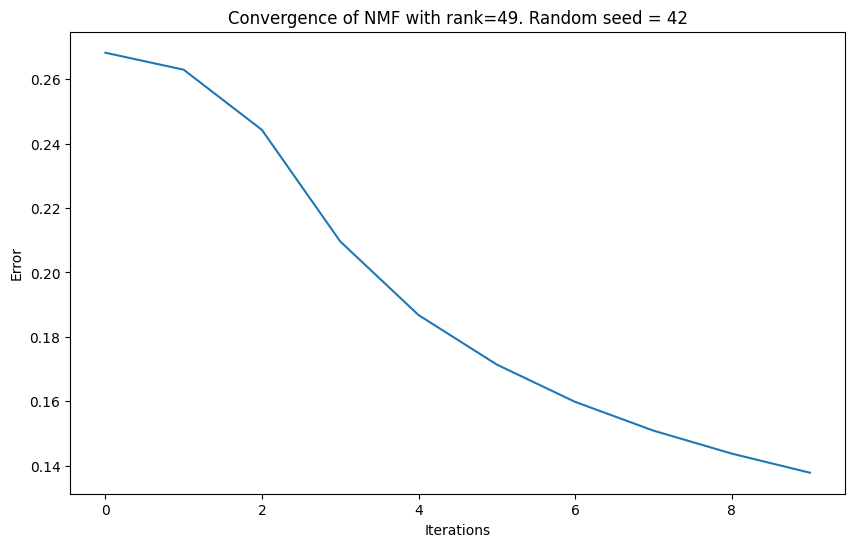

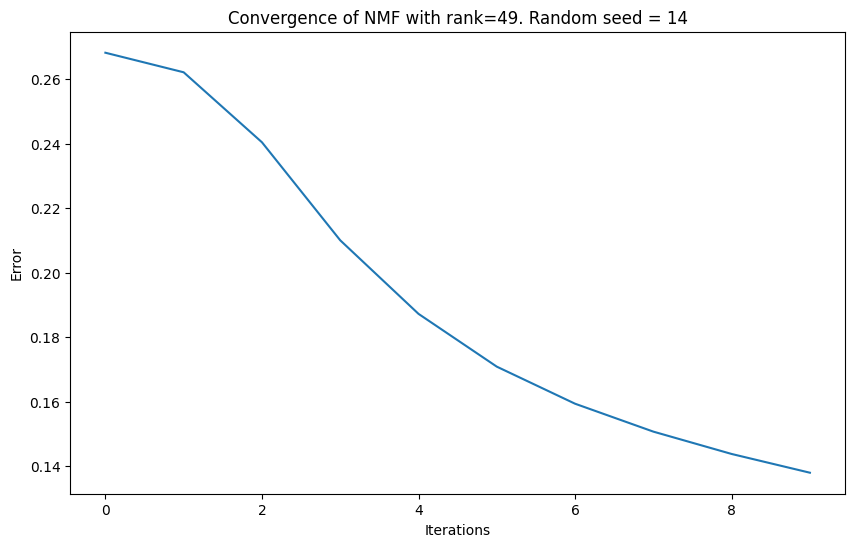

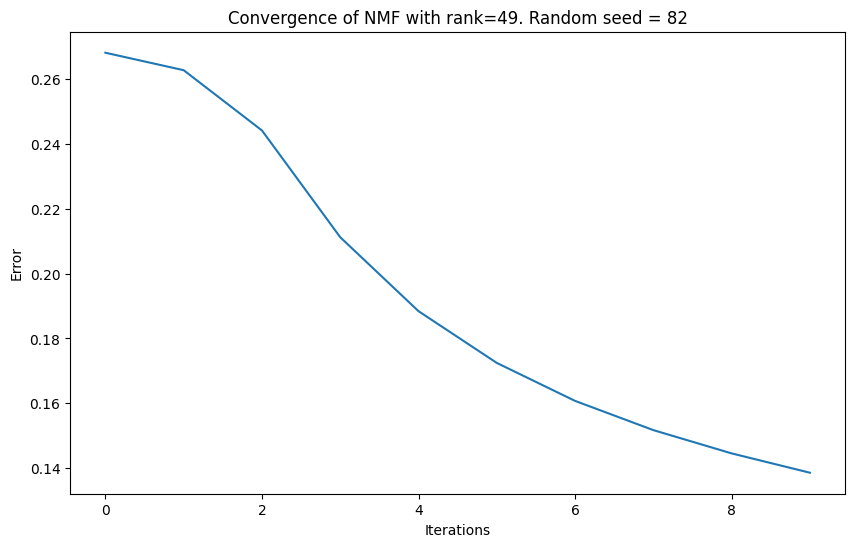

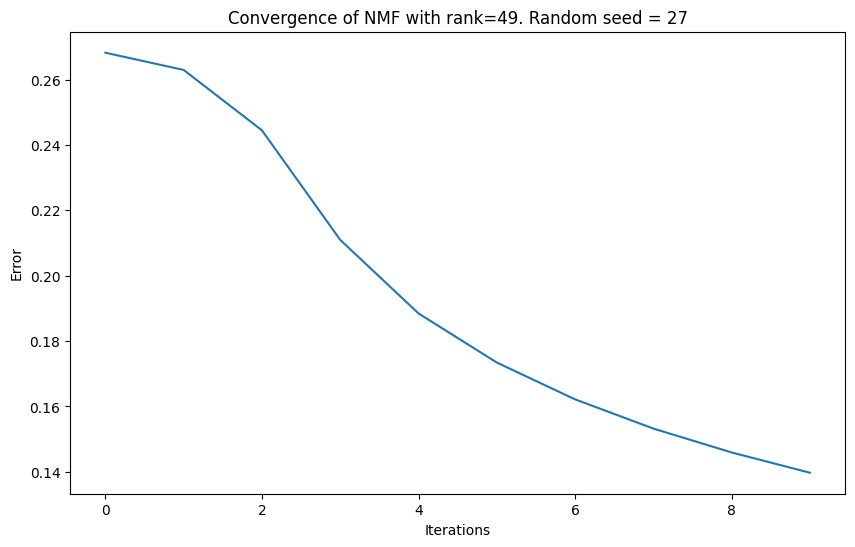

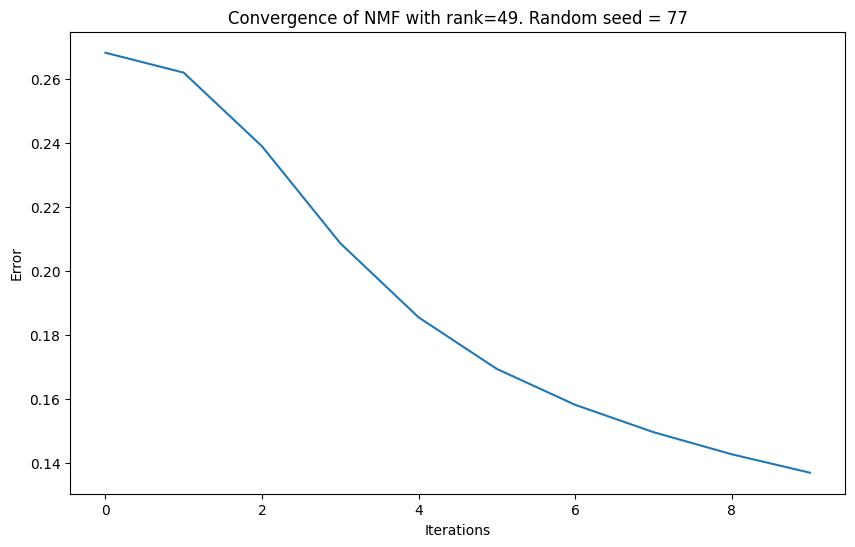

In [25]:
%time
r = 49
m, n = faces.shape
# Example usage
for i in range(5):
    W, H = nmf_multiplicative_update(faces, rank=r, max_iter=100, error_calc=error_calc_efficiently, seed=int(np.random.rand() * 100))

### (b) [3] A very powerful method to initialize factor W (0) for the task of blind hyperspectral unmixing is called Vertex Component Analysis (VCA) [Nascimento et al., 2004]. 
You can find a simple Python implementation by clicking [here](https://colab.research.google.com/drive/1VXxn7cWtbPVTDr8RxYXLI07kU_rZPpnY?usp=sharing). To make the most of this initialization method, we recommend reversing the order in which the W and H matrices are updated in Algorithm 2, i.e. updating the H factor first (one or more ?), then the W factor (why?). 

Repeat tasks 3 with initial W (0) computed with VCA with ”snr input” input parameter of VCA routine set to 15dB. 

Do you get the same results?

In [26]:
# -*- coding: utf-8 -*-
import sys
import numpy as np


#############################################
# Internal functions
#############################################

def estimate_snr(Y,r_m,x):

  [L, N] = Y.shape           # L number of bands (channels), N number of pixels
  [p, N] = x.shape           # p number of endmembers (reduced dimension)

  P_y     = np.sum(Y**2)/float(N)
  P_x     = np.sum(x**2)/float(N) + np.sum(r_m**2)
  snr_est = 10*np.log10( (P_x - p/L*P_y)/(P_y - P_x) )

  return snr_est



def vca(Y,R,verbose = True,snr_input = 0):
# Vertex Component Analysis
#
# Ae, indice, Yp = vca(Y,R,verbose = True,snr_input = 0)
#
# ------- Input variables -------------
#  Y - matrix with dimensions L(channels) x N(pixels)
#      each pixel is a linear mixture of R endmembers
#      signatures Y = M x s, where s = gamma x alfa
#      gamma is a illumination perturbation factor and
#      alfa are the abundance fractions of each endmember.
#  R - positive integer number of endmembers in the scene
#
# ------- Output variables -----------
# Ae     - estimated mixing matrix (endmembers signatures)
# indice - pixels that were chosen to be the most pure
# Yp     - Data matrix Y projected.
#
# ------- Optional parameters---------
# snr_input - (float) signal to noise ratio (dB)
# v         - [True | False]
# ------------------------------------
#
# Author:
# This code is a translation of a matlab code provided by
# Jose Nascimento (zen@isel.pt) and Jose Bioucas Dias (bioucas@lx.it.pt)
# available at http://www.lx.it.pt/~bioucas/code.htm under a non-specified Copyright (c)
# Translation of last version at 22-February-2018 (Matlab version 2.1 (7-May-2004))
#
# more details on:
# Jose M. P. Nascimento and Jose M. B. Dias
# "Vertex Component Analysis: A Fast Algorithm to Unmix Hyperspectral Data"
# submited to IEEE Trans. Geosci. Remote Sensing, vol. .., no. .., pp. .-., 2004
#
#

  #############################################
  # Initializations
  #############################################
  if len(Y.shape)!=2:
    sys.exit('Input data must be of size L (number of bands i.e. channels) by N (number of pixels)')

  [L, N]=Y.shape   # L number of bands (channels), N number of pixels

  R = int(R)
  if (R<0 or R>L):
    sys.exit('ENDMEMBER parameter must be integer between 1 and L')

  #############################################
  # SNR Estimates
  #############################################

  if snr_input==0:
    y_m = np.mean(Y,axis=1,keepdims=True)
    Y_o = Y - y_m           # data with zero-mean
    Ud  = np.linalg.svd(np.dot(Y_o,Y_o.T)/float(N))[0][:,:R]  # computes the R-projection matrix
    x_p = np.dot(Ud.T, Y_o)                 # project the zero-mean data onto p-subspace

    SNR = estimate_snr(Y,y_m,x_p);

    if verbose:
      print("SNR estimated = {}[dB]".format(SNR))
  else:
    SNR = snr_input
    if verbose:
      print("input SNR = {}[dB]\n".format(SNR))

  SNR_th = 15 + 10*np.log10(R)

  #############################################
  # Choosing Projective Projection or
  #          projection to p-1 subspace
  #############################################

  if SNR < SNR_th:
    if verbose:
      print("... Select proj. to R-1")

      d = R-1
      if snr_input==0: # it means that the projection is already computed
        Ud = Ud[:,:d]
      else:
        y_m = np.mean(Y,axis=1,keepdims=True)
        Y_o = Y - y_m  # data with zero-mean

        Ud  = np.linalg.svd(np.dot(Y_o,Y_o.T)/float(N))[0][:,:d]  # computes the p-projection matrix
        x_p =  np.dot(Ud.T,Y_o)                 # project thezeros mean data onto p-subspace

      Yp =  np.dot(Ud,x_p[:d,:]) + y_m      # again in dimension L

      x = x_p[:d,:] #  x_p =  Ud.T * Y_o is on a R-dim subspace
      c = np.amax(np.sum(x**2,axis=0))**0.5
      y = np.vstack(( x, c*np.ones((1,N)) ))
  else:
    if verbose:
      print("... Select the projective proj.")

    d = R
    Ud  = np.linalg.svd(np.dot(Y,Y.T)/float(N))[0][:,:d] # computes the p-projection matrix

    x_p = np.dot(Ud.T,Y)
    Yp =  np.dot(Ud,x_p[:d,:])      # again in dimension L (note that x_p has no null mean)

    x =  np.dot(Ud.T,Y)
    u = np.mean(x,axis=1,keepdims=True)        #equivalent to  u = Ud.T * r_m
    y =  x / np.dot(u.T,x)


  #############################################
  # VCA algorithm
  #############################################

  indice = np.zeros((R),dtype=int)
  A = np.zeros((R,R))
  A[-1,0] = 1

  for i in range(R):
    w = np.random.rand(R,1);
    f = w - np.dot(A,np.dot(np.linalg.pinv(A),w))
    f = f / np.linalg.norm(f)

    v = np.dot(f.T,y)

    indice[i] = np.argmax(np.absolute(v))
    A[:,i] = y[:,indice[i]]        # same as x(:,indice(i))

  Ae = Yp[:,indice]

  return Ae,indice,Yp

In [27]:
# Function to perform NMF using the Multiplicative Update (MU) algorithm
def nmf_multiplicative_with_vca(X, rank, max_iter=300, tol=1e-6, log_step=10, error_calc=error_calc, seed=42):
    """
    Performs Nonnegative Matrix Factorization using the Multiplicative Update algorithm.
    
    Parameters:
        X (numpy array): The data matrix of shape (m, n).
        rank (int): The number of components (k).
        max_iter (int): The maximum number of iterations.
        tol (float): The tolerance for convergence.
    
    Returns:
        W (numpy array): The basis matrix of shape (m, k).
        H (numpy array): The coefficient matrix of shape (k, n).
    """
    m, n = X.shape
    # Initialize W and H with random nonnegative values
    np.random.seed(seed)
    W, indice, Yp = vca(X, rank, verbose = True, snr_input = 15)
    print(Yp.shape)
    H = Yp[:rank, :]

    errors = []
    for i in range(max_iter):
        # Update H
        H = H * (W.T @ X)/(W.T @ W @ H + 1e-9) # Adding a small value to avoid division by zero
        # Update W
        W = W * (X @ H.T)/(W @ H @ H.T + 1e-9)
        
        # Check convergence based on reconstruction error
        if i % log_step == 0:
            errors.append(error_calc(X, W, H))
            # Check for convergence
            if i > 0 and abs(errors[-2] - errors[-1]) < tol:
                print("Converged.")
                break

    plt.figure(figsize=(10, 6))
    plt.plot(errors)
    plt.title(f"Convergence of NMF with rank={rank}. Random seed = {seed}")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.show()
    return W, H

CPU times: user 7 μs, sys: 1 μs, total: 8 μs
Wall time: 14.1 μs
input SNR = 15[dB]

... Select proj. to R-1
(162, 94249)


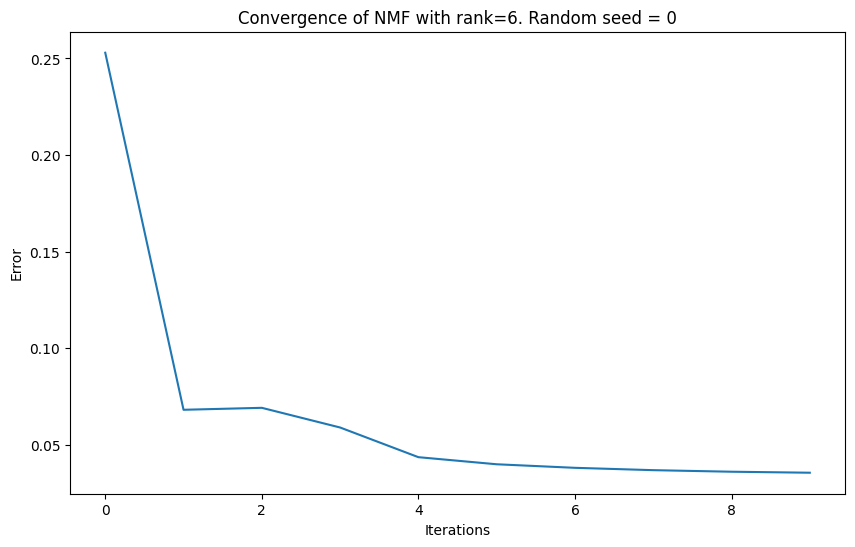

In [28]:
%time
r = 6
m, n = urbans.shape
# Example usage
W, H = nmf_multiplicative_with_vca(urbans, rank=r, max_iter=100, error_calc=error_calc, seed=0)

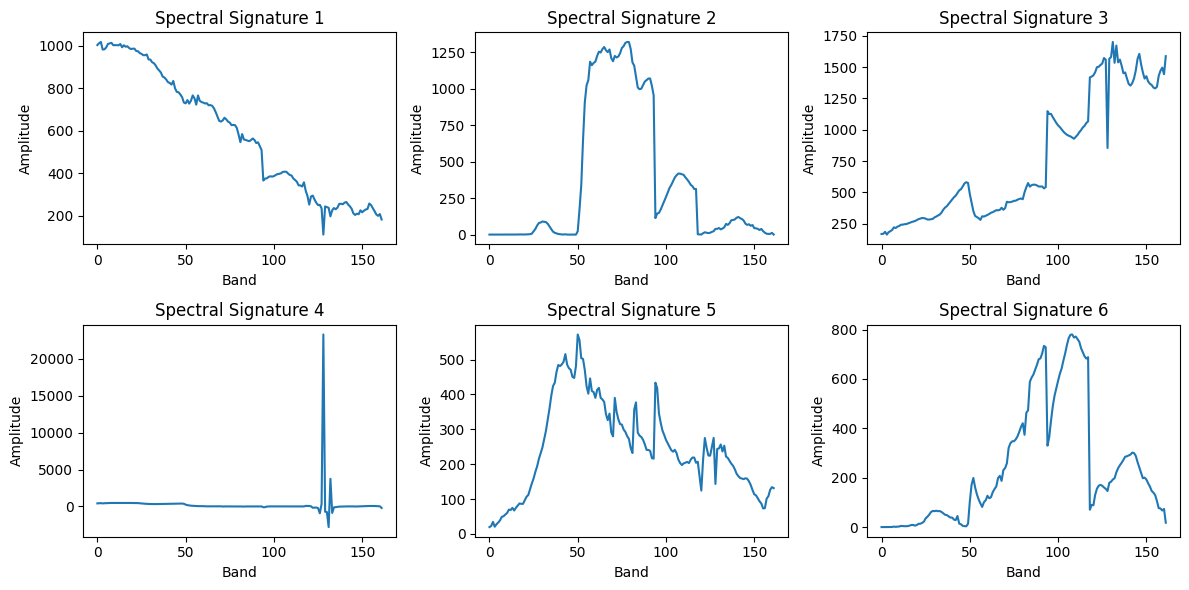

In [29]:
plt.figure(figsize=(12, 6))
for i in range(W.shape[1]):  
    plt.subplot(2,3, i + 1)
    plt.plot(W[:, i])  
    plt.title(f"Spectral Signature {i+1}")
    plt.xlabel("Band")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


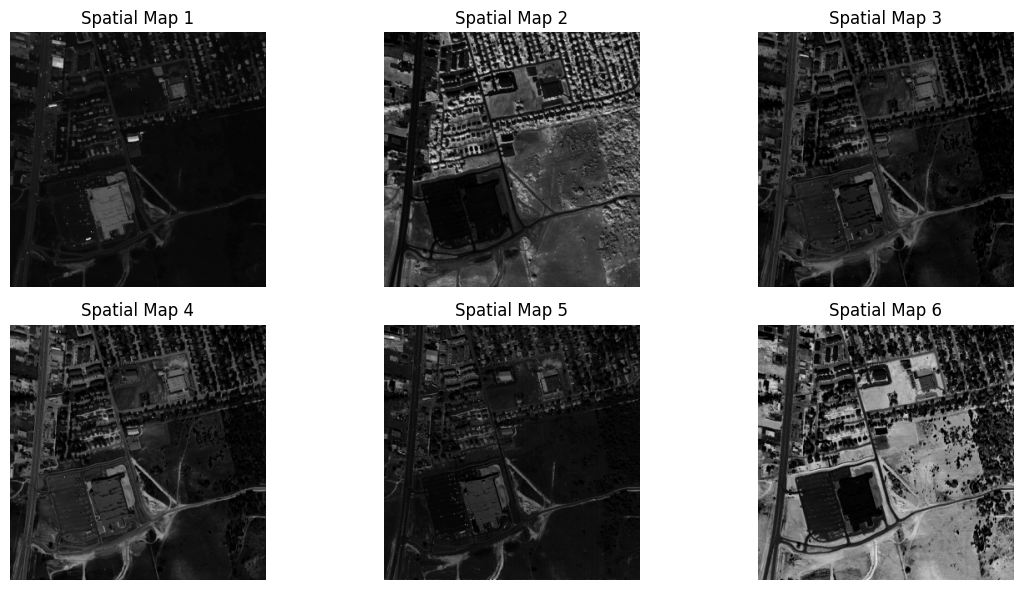

In [30]:
plt.figure(figsize=(12, 6))
for i in range(H.shape[0]):
    spatial_map = H[i, :].reshape(307, 307)  
    plt.subplot(2, 3, i + 1)
    plt.imshow(spatial_map, cmap='gray')
    plt.title(f"Spatial Map {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Q3: Compression of Convolutional Kernel in CNN with Canonical Polyadic Decomposition (CPD)

Consider the convolutional kernel, W, in layer 4.1conv1 of the pretrained Resnet18. The kernel has size of 512 × 521 × 3 × 3.

In [31]:
import torch
import tensorly as tl
from tensorly.decomposition import parafac
import matplotlib.pyplot as plt
import numpy as np

# Set the backend for Tensorly to PyTorch
tl.set_backend('pytorch')

# Load the pretrained ResNet18 model and extract the convolutional kernel
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
kernel = model.layer4[1].conv1.weight.data

# Convert the kernel to a Tensorly tensor
kernel_tl = tl.tensor(kernel)

Using cache found in /home/luzinsan/.cache/torch/hub/pytorch_vision_v0.10.0


We extracted the convolutional kernel W from model.layer4[1].conv1.weight.data. This kernel has the shape (512, 512, 3, 3), representing `(output_channels, input_channels, kernel_height, kernel_width).`

### (a) [5] Reshape the tensor to order-3 tensor of size 512 × 512 × 9, then decompose it by CPD with different ranks R = 30, ..., 300. 
Plot the compression ratios vs Rank and the relative approximation error vs Rank.

In [32]:
# Reshape the tensor to an order-3 tensor of size 512 × 512 × 9
kernel_tl = tl.reshape(kernel_tl, (512, 512, 9))

The CP decomposition factorizes a tensor $\mathcal{X}$ into a sum of rank-1 tensors:

$$\mathcal{X} \approx \sum_{r=1}^{R} \lambda_r \cdot u_r \circ v_r \circ w_r$$

where:

*   $R$ is the rank of the decomposition.
*   $u_r$, $v_r$, $w_r$ are vectors.
*   $λ_r$ are the component weights.
*   $◦$ denotes the outer product.

**In our case (3D tensor):**

*   The original kernel (after reshaping) is a 3D tensor $\mathcal{X}$ of size 512 × 512 × 9.
*   CPD decomposes it into a sum of `R` rank-1 tensors.
*   Each rank-1 tensor is formed by the outer product of three vectors: $u_r$ (512x1), $v_r$ (512x1), and $w_r$ (9x1).
*   The factors `A`, `B`, and `C` returned by `parafac` are matrices where each column represents the vectors $u_r$, $v_r$, and $w_r$ respectively for r=1,...,R.

**Compression Ratio:**

*   **Original tensor size:** 512 \* 512 \* 9
*   **Compressed size:** (512 \* R) + (512 \* R) + (9 \* R) + R = `R * (512 + 512 + 9 + 1)` (The "+1" comes from the corresponding `weight` of `weights` in `tl.cp_to_tensor((weights, factors))`)

Therefore, the compression ratio is:

$$\frac{512 \times 512 \times 9}{R \times (512 + 512 + 9 + 1)}$$

**Relative Approximation Error:**

The relative approximation error measures how well the compressed tensor approximates the original tensor. It's calculated as:

$$\frac{||\mathcal{X} - \hat{\mathcal{X}}||_F}{||\mathcal{X}||_F}$$

where:

*   $\mathcal{X}$ is the original tensor.
*   $\hat{\mathcal{X}}$ is the reconstructed tensor from the CPD factors.
*   $||\cdot||_F$ is the Frobenius norm.



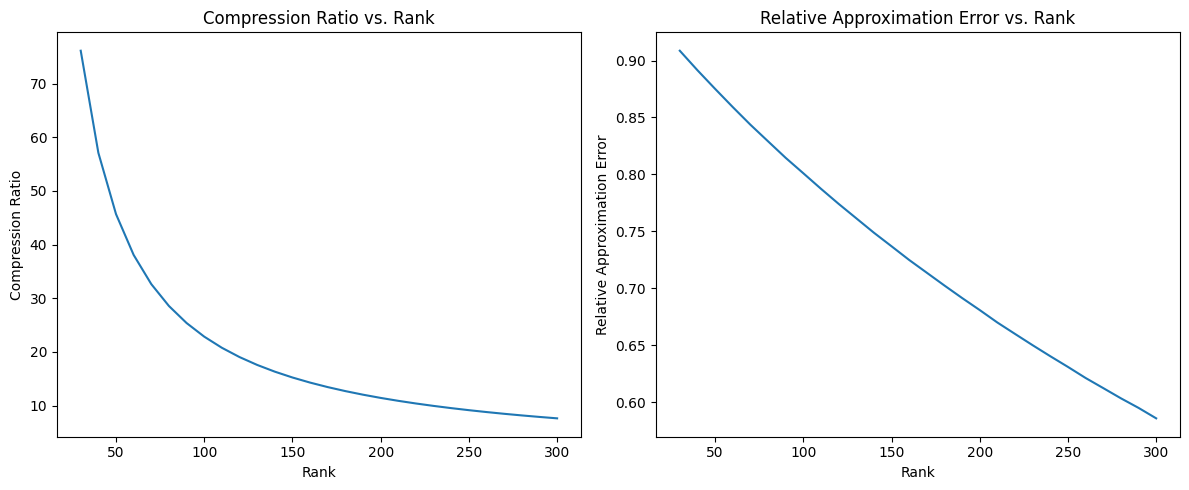

In [33]:
# Perform CPD for different ranks and calculate compression ratios and relative errors
ranks = range(30, 301, 10)
compression_ratios = []
relative_errors = []

for rank in ranks:
    # Perform CP decomposition
    weights, factors = parafac(kernel_tl, rank=rank, init='random', tol=1e-6, n_iter_max=100, verbose=False)

    # Compute the compressed tensor
    compressed_kernel = tl.cp_to_tensor((weights, factors))

    # Calculate the compression ratio
    original_size = np.prod(kernel_tl.shape)
    compressed_size = sum(np.prod(f.shape) for f in factors)
    compression_ratio = original_size / compressed_size
    compression_ratios.append(compression_ratio)

    # Calculate the relative approximation error
    relative_error = tl.norm(kernel_tl - compressed_kernel) / tl.norm(kernel_tl)
    relative_errors.append(relative_error)

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(ranks, compression_ratios)
plt.xlabel("Rank")
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio vs. Rank")

plt.subplot(1, 2, 2)
plt.plot(ranks, relative_errors)
plt.xlabel("Rank")
plt.ylabel("Relative Approximation Error")
plt.title("Relative Approximation Error vs. Rank")

plt.tight_layout()
plt.show()

### (b) [3] Factorizing weights in convolutional and fully connected layers allows for the replacement of dense, large kernels with a network of smaller kernels. 
Specifically, employing a low-rank approximation (such as a low-rank CPD) of these kernels reduces the number of parameters in convolutional layers, thereby accelerating the network’s inference. 

However, as noted by Lebedev et al. (2015), fine-tuning the entire network can be unstable! Tensor decomposition may not be very effective if neural networks with factorized layers exhibit instability and are sensitive to parameter changes.


Additionally, applying tensor decompositions to compress convolutional neural networks (CNNs) is not straightforward, primarily due to the sensitivity of the Canonical Polyadic Decomposition (CPD), which is also referred to as the degree of degeneracy.


There are two possible measures for the sensitivity degree, or degeneracy degree, in the CPD [A, B, C] of a given tensor T of size I × J × K:

1. Measure 1 - Norms of the rank-1 tensors [Phan et al., 2019]:

$$sn[A,B,C] = \sum^R_{r=1}||a_r \odot b_r \odot c_r||^2_F \space (4)$$

2. Measure 2 - Sensitivity in the sense of [Tichavský et al., 2019]:
$$ss[A,B,C] = \lim_{\sigma^2 \to 0}\frac{1}{\sigma^2 R} E\{||\mathcal{\Tau} - [A + \delta A,B + \delta B,C + \delta C]||^2_F\} \space (5)$$

where $\delta A, \delta B, \delta C$ have random i.i.d. elements from $N (0, \sigma^2)$. It is a measure with respect to perturbations in individual factor matrices. Hopefully for us, Equation (5) can be simplified as follows:
$$ss[[A, B, C]] = K trace\{(A^T A) ⊙ (B^T B)\} + I trace\{(B^T B) ⊙ (C^T C)\} + J trace\{(A^T A) ⊙ (C^T C)\} \space (6)$$

with ⊙ the Hadamard product (element-wise matrix product).

Decompositions with high sensitivity are usually useless, for instance when it is around $10^4 − 10^5$. 

Compute the sensitivity of the decompositions obtained at point (a) with Equation (6), what is your conclusion ? Is the sensitivity measure related to the unbalancing of rank-1 tensor norms ?

In [34]:
sensitivities = []
rank_1_norms = []  # List to store norms of rank-1 tensors

for rank in ranks:
    weights, factors = parafac(kernel_tl, rank=rank, random_state=0,
                               init='random', tol=1e-6, 
                               n_iter_max=100, verbose=False, 
                               return_errors=False)
    
    # Unpack the factors
    A, B, C = factors
    I, J, K = A.shape[0], B.shape[0], C.shape[0]

    # Compute the sensitivity using Equation (6)
    sensitivity = K * tl.trace((A.T @ A) * (B.T @ B)) + \
                  I * tl.trace((B.T @ B) * (C.T @ C)) + \
                  J * tl.trace((A.T @ A) * (C.T @ C))
    sensitivities.append(sensitivity)

    # Compute the norms of rank-1 tensors
    current_rank_norms = []
    for i in range(rank):
        component = tl.cp_to_tensor((None, 
                                     [A[:, i:i + 1], B[:, i:i + 1], C[:, i:i + 1]]))
        current_rank_norms.append(tl.norm(component))
    rank_1_norms.append(current_rank_norms)

Sensitivities for different ranks: [tensor(43287764.), tensor(60643940.), tensor(67374912.), tensor(75457216.), tensor(78941384.), tensor(84304056.), tensor(1.1724e+08), tensor(1.5350e+08), tensor(1.2687e+08), tensor(1.5468e+08), tensor(1.2877e+08), tensor(1.4332e+08), tensor(1.6447e+08), tensor(1.6385e+08), tensor(1.9348e+08), tensor(1.8223e+08), tensor(1.8879e+08), tensor(2.0595e+08), tensor(2.0514e+08), tensor(1.9772e+08), tensor(2.1829e+08), tensor(2.3201e+08), tensor(2.3137e+08), tensor(2.4723e+08), tensor(2.3312e+08), tensor(2.5779e+08), tensor(2.8902e+08), tensor(2.3382e+08)]


Text(0.5, 1.0, 'Sensitivity values vs. Rank')

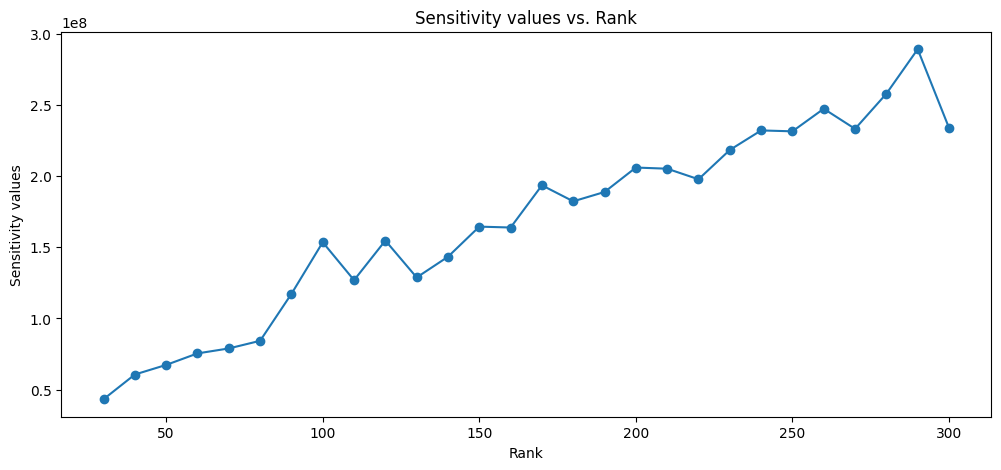

In [35]:
print("Sensitivities for different ranks:", sensitivities)
# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(ranks, sensitivities, marker='o')
plt.xlabel("Rank")
plt.ylabel("Sensitivity values")
plt.title("Sensitivity values vs. Rank")

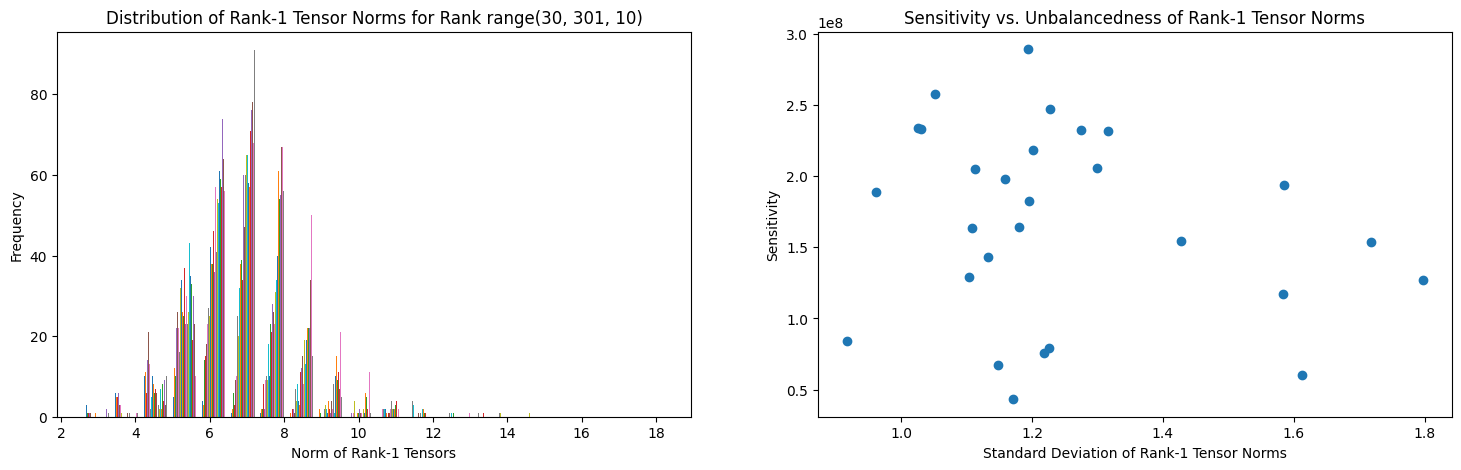

In [ ]:
# Visualize the distribution of rank-1 tensor norms (for different ranks)
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.hist(rank_1_norms, bins=20)
plt.xlabel("Norm of Rank-1 Tensors")
plt.ylabel("Frequency")
plt.title(f"Distribution of Rank-1 Tensor Norms for Rank {ranks}")

# Analyze the relationship between sensitivity and the unbalancing of rank-1 tensor norms
# Calculate the standard deviation of the norms for each rank
std_devs = [np.std(norms) for norms in rank_1_norms]

# Plot sensitivity vs. standard deviation of norms
plt.subplot(1,2,2)
plt.scatter(std_devs, sensitivities)
plt.xlabel("Standard Deviation of Rank-1 Tensor Norms")
plt.ylabel("Sensitivity")
plt.title("Sensitivity vs. Unbalancedness of Rank-1 Tensor Norms")
plt.show()

Distribution of Rank-1 Tensor Norms for Different Ranks:


- The distributions are generally right-skewed, with most norms concentrated between 4 and 10, however, now the outliers are more frequent.
- There's a longer tail on the right side, and the maximum value is around 18.
- The distributions for different ranks overlap, but there's a slight shift towards higher norms as the rank increases.

Sensitivity vs. Unbalancedness of Rank-1 Tensor Norms
- There appears to be a weak positive correlation between standard deviation and sensitivity. As the standard deviation increases (more unbalanced norms), the sensitivity tends to increase, though there is a considerable amount of scatter in the data. Also, comparing to the previous plot, the values of std and sensitivity are higher.
- The data points are more widely spread, suggesting that the relationship is not very strong or linear.
- The sensitivity values range from around 5e7 to 3e8, which are relatively high.



### (c) [2] There are various methods available to address degeneracy, which can enhance stability and convergence. 
Notable approaches include adding orthogonality constraints to the factors of the Canonical Polyadic Decomposition (CPD), incorporating Tikhonov regularization on the factors, and more recently, the Error Preserving Correction (EPC) method. In this context, we will explore Tikhonov regularization by setting the Tikhonov matrices to identity matrices for simplicity. This approach is equivalent to applying squared Frobenius norm regularization to each factor A, B, and C. With a weight μ, CPD with such regularizations can be computed using the constrained parafa function from Tensorly. Repeat steps (a) and (b) with μ = [0.1, 1, 10]. What observations do you make?

In [42]:
from tensorly.decomposition import constrained_parafac

In [43]:
mus = [0.1, 1, 10]
reg_compression_ratios = []
reg_relative_errors = []
reg_sensitivities = []
ranks = range(30,301,30)

for mu in mus:
    print(f"\n--- Regularization with mu = {mu} ---")
    mu_compression_ratios = []
    mu_relative_errors = []
    mu_sensitivities = []
    for rank in ranks:
        I, J, K = kernel_tl.shape
        reg_matrices = [mu * np.eye(rank) for _ in range(3)]
        weights, factors = constrained_parafac(
            kernel_tl,
            rank=rank,
            init="random",
            tol_inner=1e-6,
            n_iter_max=100,
            verbose=False,
            return_errors=False,
            l2_square_reg=mu, 
        )

        # Compute the compressed tensor
        compressed_kernel = tl.cp_to_tensor((weights, factors))

        # Calculate the compression ratio
        original_size = np.prod(kernel_tl.shape)
        compressed_size = sum(np.prod(f.shape) for f in factors)
        compression_ratio = original_size / compressed_size

        # Calculate the relative approximation error
        relative_error = tl.norm(kernel_tl - compressed_kernel) / tl.norm(kernel_tl)

        # Compute the sensitivity
        A, B, C = factors
        sensitivity = (
            K * tl.trace((A.T @ A) * (B.T @ B))
            + I * tl.trace((B.T @ B) * (C.T @ C))
            + J * tl.trace((A.T @ A) * (C.T @ C))
        )

        print(
            f"Rank: {rank}, Compression Ratio: {compression_ratio:.2f}, Relative Error: {relative_error:.4f}, Sensitivity: {sensitivity:.2f}"
        )

        mu_compression_ratios.append(compression_ratio)
        mu_relative_errors.append(relative_error)
        mu_sensitivities.append(sensitivity)

    reg_compression_ratios.append(mu_compression_ratios)
    reg_relative_errors.append(mu_relative_errors)
    reg_sensitivities.append(mu_sensitivities)


--- Regularization with mu = 0.1 ---
Rank: 30, Compression Ratio: 76.13, Relative Error: 0.9119, Sensitivity: 1545970.50
Rank: 60, Compression Ratio: 38.07, Relative Error: 0.8652, Sensitivity: 1194697.38
Rank: 90, Compression Ratio: 25.38, Relative Error: 0.8240, Sensitivity: 1085091.88
Rank: 120, Compression Ratio: 19.03, Relative Error: 0.7861, Sensitivity: 1157079.12
Rank: 150, Compression Ratio: 15.23, Relative Error: 0.7515, Sensitivity: 1235138.38
Rank: 180, Compression Ratio: 12.69, Relative Error: 0.7196, Sensitivity: 1061825.75
Rank: 210, Compression Ratio: 10.88, Relative Error: 0.6902, Sensitivity: 1165857.75
Rank: 240, Compression Ratio: 9.52, Relative Error: 0.6625, Sensitivity: 1266004.25
Rank: 270, Compression Ratio: 8.46, Relative Error: 0.6366, Sensitivity: 1105797.38
Rank: 300, Compression Ratio: 7.61, Relative Error: 0.6129, Sensitivity: 1106017.38

--- Regularization with mu = 1 ---
Rank: 30, Compression Ratio: 76.13, Relative Error: 0.9617, Sensitivity: 584455.62

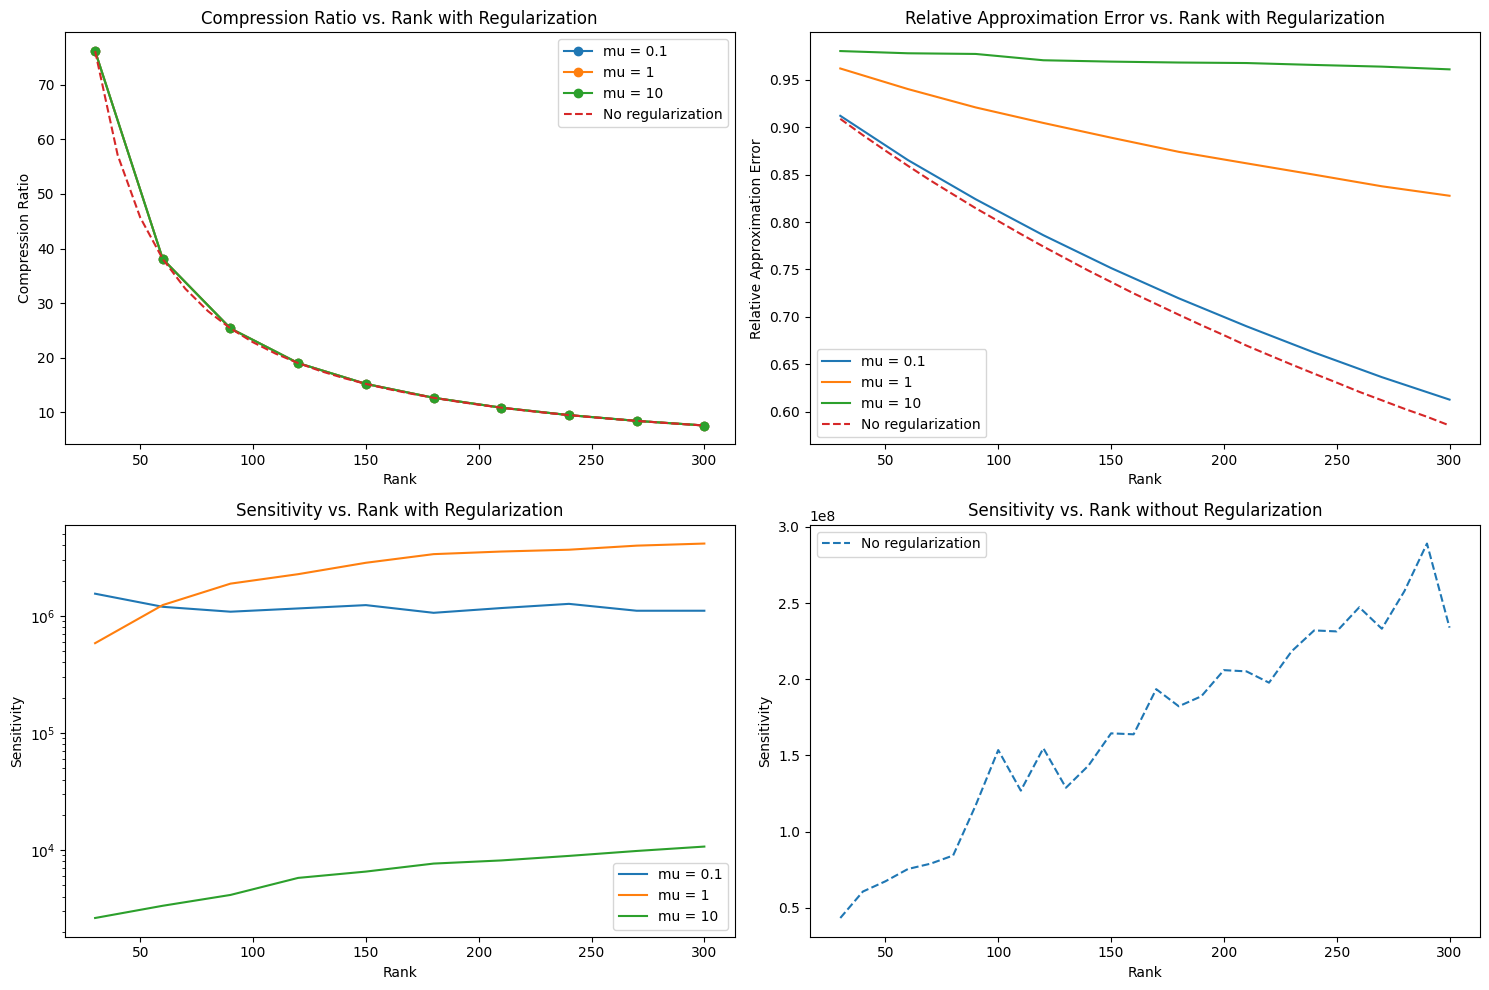

In [44]:
# Plotting the results for different mu values
old_ranks = range(30, 301, 10)
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for i, mu in enumerate(mus):
    plt.plot(ranks, reg_compression_ratios[i], marker='o',label=f"mu = {mu}")

plt.plot(old_ranks, compression_ratios, label="No regularization", linestyle="--")
plt.xlabel("Rank")
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio vs. Rank with Regularization")
plt.legend()

plt.subplot(2, 2, 2)
for i, mu in enumerate(mus):
    plt.plot(ranks, reg_relative_errors[i], label=f"mu = {mu}")
plt.plot(old_ranks, relative_errors, label="No regularization", linestyle="--")
plt.xlabel("Rank")
plt.ylabel("Relative Approximation Error")
plt.title("Relative Approximation Error vs. Rank with Regularization")
plt.legend()


plt.subplot(2, 2, 3)
for i, mu in enumerate(mus):
    plt.semilogy(ranks, reg_sensitivities[i], label=f"mu = {mu}") 
    
plt.xlabel("Rank")
plt.ylabel("Sensitivity")
plt.title("Sensitivity vs. Rank with Regularization")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(old_ranks, sensitivities, label="No regularization", linestyle="--")
plt.xlabel("Rank")
plt.ylabel("Sensitivity")
plt.title("Sensitivity vs. Rank without Regularization")
plt.legend()

plt.tight_layout()
plt.show()

**1. Compression Ratio vs. Rank with Regularization:**

- As we increase the "rank" (which you can think of as the level of detail we keep in our compressed representation), the compression ratio goes down. This makes sense: higher rank means a more detailed representation, so less compression. But regularization (`mu`) doesn't affect the compression ratio.

**2. Relative Approximation Error vs. Rank with Regularization:**

*   `mu = 10` (green line) has the highest error.
*   `mu = 1` (orange line) has a medium error.
*   `mu = 0.1` (blue line) has the lowest error, close to "No regularization" (red dashed line).
*    Stronger regularization (`mu`) can hurt the accuracy of the approximation. We see a trade-off: better stability (as we'll see in the next graph) comes at the cost of accuracy.

**3. Sensitivity vs. Rank with Regularization:**

*   `mu = 10` (green line) has the lowest sensitivity, meaning it's the most stable.
*   `mu = 1` (orange line) has medium sensitivity.
*   `mu = 0.1` (blue line) has high sensitivity, close to "No regularization" (red dashed line). Also, we can see that sensitivity for `mu = 0.1` and without regularization are quite close, meaning that we don't have big impact from regularization.

* Regularization significantly reduces sensitivity, especially as the rank decreases. A higher `mu` value leads to a more stable decomposition, but as we saw in the previous graph, it also introduces more error.



Would you recommend this method for addressing degeneracy?

Based on the results, the answer is likely **yes**, Tikhonov regularization is recommended, as it significantly reduces sensitivity. However, the optimal value of `mu` needs to be chosen carefully, taking into account the desired trade-off between stability, accuracy, and compression. We might need to experiment with different `mu` values to find the best one for our specific application.
